**COVID-19 Patient Symptoms & Diagnosis Dataset**



This dataset contains patient-level records related to COVID-19 symptoms and diagnosis outcomes. Each entry includes demographic details (Age, Gender, City), clinical indicators (Fever temperature, Cough severity), and the final label (Has_Covid). The data spans multiple Indian cities, offering a diverse sample across different age groups and symptom intensities. The dataset is designed to support classification tasks such as predicting COVID-19 positivity based on symptoms and demographics. It can also be used for exploratory data analysis, visualization, and machine learning projects in healthcare analytics.

In [74]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

In [75]:

data = pd.read_csv(r"C:\Users\ABHIJITH\Downloads\covid_dataset.csv")

In [76]:
print(data.head())

   Age  Gender  Fever   Cough       City Has_Covid
0   56    Male  102.4    Mild     Mumbai        No
1   19  Female  101.6  Strong     Mumbai        No
2   76  Female  102.0    Mild    Kolkata        No
3   65    Male   99.7    Mild  Bangalore        No
4   25  Female  102.1    Mild      Delhi       Yes


In [77]:
print(data.shape)

(1000, 6)


In [78]:
print(data['Age'].describe())

count    1000.000000
mean       43.461000
std        23.267399
min         5.000000
25%        23.000000
50%        43.000000
75%        64.000000
max        85.000000
Name: Age, dtype: float64


In [79]:
print(data['Fever'].describe())

count    1000.000000
mean      100.518400
std         1.441339
min        98.000000
25%        99.200000
50%       100.600000
75%       101.700000
max       103.000000
Name: Fever, dtype: float64


In [81]:
data['Has_Covid'].isna().sum()

np.int64(0)

In [82]:
#Converting the Y as 1 and 0
data['Has_Covid'] = data['Has_Covid'].map({'Yes':1,'No':0})

In [93]:
x1=np.array(data['Age'])
x2=np.array(data['Fever'])
y1=np.array(data['Has_Covid'])

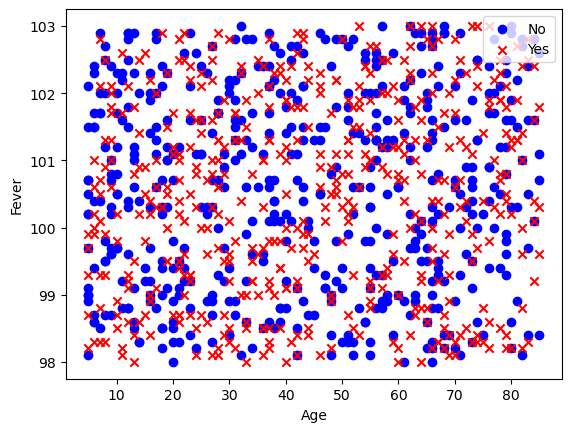

In [95]:
plt.Figure()
plt.scatter(x1[y1==0],x2[y1==0],marker='o',c='b',label='No')
plt.scatter(x1[y1==1],x2[y1==1],marker='x',c='r',label='Yes')
plt.xlabel('Age')
plt.ylabel('Fever')
plt.legend()


In [96]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

In [84]:
x = data.drop(columns=['Has_Covid'])
y = data['Has_Covid']

In [85]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

In [86]:
num_cols = ['Age','Fever']
cat_cols = ['Gender','Cough','City']

In [87]:
preprocess  = ColumnTransformer([
    ('num', StandardScaler(),num_cols),
    ('cat', OneHotEncoder(),cat_cols)
])

In [88]:
model = Pipeline([
    ('pre', preprocess),
    ('lr', LogisticRegression(max_iter = 10000))
])

In [91]:
model.fit(x_train,y_train)

,steps,"[('pre', ...), ('lr', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [97]:
pred = model.predict(x_test)
proba = model.predict_proba(x_test)[:,1]

In [98]:
print("Accuracy", accuracy_score(y_test,pred))
print("ROC AUC", roc_auc_score(y_test, pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy 0.5
ROC AUC 0.4955929487179488
[[63 41]
 [59 37]]
              precision    recall  f1-score   support

           0       0.52      0.61      0.56       104
           1       0.47      0.39      0.43        96

    accuracy                           0.50       200
   macro avg       0.50      0.50      0.49       200
weighted avg       0.50      0.50      0.49       200



In [113]:
model.score(x_train,y_train)

0.52375

In [114]:
model.score(x_test,y_test)

0.5

In [104]:
data['Has_Covid'].value_counts()

Has_Covid
0    518
1    482
Name: count, dtype: int64

In [105]:
data['Has_Covid'].unique()

array([0, 1])

In [106]:
pd.crosstab(data['Cough'],data['Has_Covid'],normalize='index')

Has_Covid,0,1
Cough,,
Mild,0.510597,0.489403
Strong,0.525988,0.474012


In [107]:
pd.crosstab(data['Gender'],data['Has_Covid'],normalize ='index')

Has_Covid,0,1
Gender,,
Female,0.496894,0.503106
Male,0.537718,0.462282


In [111]:
data.groupby('Has_Covid')[['Age','Fever']].describe()

Age                                                     Fever  \
           count       mean        std  min   25%   50%   75%   max  count   
Has_Covid                                                                    
0          518.0  42.722008  23.723584  5.0  20.0  42.0  64.0  85.0  518.0   
1          482.0  44.255187  22.764802  5.0  25.0  43.0  64.0  85.0  482.0   

                                                                  
                 mean       std   min   25%    50%    75%    max  
Has_Covid                                                         
0          100.565251  1.443303  98.0  99.3  100.6  101.8  103.0  
1          100.468050  1.439023  98.0  99.2  100.5  101.7  103.0

In [112]:
pd.crosstab(data['City'],data['Has_Covid'],normalize = 'index').sort_values(1,ascending = False)

Has_Covid,0,1
City,,
Delhi,0.480144,0.519856
Bangalore,0.484716,0.515284
Kolkata,0.549020,0.450980
Mumbai,0.560669,0.439331


**Conclusion**

Model is giving weak output

Crosstabs and distribution shows very weak signals

Weak target feature relation - model gives accuracy that is close to random prediction

More data or additional features required